<a href="https://colab.research.google.com/github/MuxtorovAbubakr/MachineLearningProjects/blob/main/AdvertisingSalesDatasetPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook demonstrates a linear regression model implemented from scratch (without `scikit-learn`) and compares its performance with `scikit-learn`'s `LinearRegression` model.

# Linear Regression with multiple features (without scikit-learn)

## Importing Libraries

We begin by importing the necessary libraries:
*   `numpy` for numerical operations.
*   `matplotlib.pyplot` for plotting.
*   `sklearn.model_selection.train_test_split` for splitting the dataset into training and testing sets.

In [495]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Loading and Analyzing the Data

We load the advertising budget and sales data from a CSV file and perform an initial analysis to understand its structure.

In [496]:
dataset = np.loadtxt('sample_data/Advertising Budget and Sales.csv', delimiter=',', skiprows=1, usecols=(1, 2, 3, 4))


### Displaying the First 5 Rows

Let's view the first few rows of the dataset to get a glimpse of the data.

In [497]:
print(dataset[:5])

[[230.1  37.8  69.2  22.1]
 [ 44.5  39.3  45.1  10.4]
 [ 17.2  45.9  69.3   9.3]
 [151.5  41.3  58.5  18.5]
 [180.8  10.8  58.4  12.9]]


### Dataset Shape

We check the dimensions of the dataset to understand how many rows (samples) and columns (features) it contains.

In [498]:
print(dataset.shape)

(200, 4)


### Separating Features (X) and Target (y)

The dataset contains advertising budgets for TV, Radio, and Newspaper as features (`X`) and Sales as the target variable (`y`). We separate these accordingly.

In [499]:
X, y = dataset[:, :3], dataset[:, -1]

### Displaying First 5 Rows of Features (X)

In [500]:
print(X[:5])

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]]


### Displaying First 5 Rows of Target (y)

In [501]:
print(y[:5])

[22.1 10.4  9.3 18.5 12.9]


## Splitting the Data into Training and Testing Sets

To evaluate our model's performance on unseen data, we split the dataset into training and testing sets. We allocate 75% for training and 25% for testing, ensuring reproducibility with a `random_state`.

In [502]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state=42, shuffle=True
)

### Displaying Shapes of Training and Testing Sets

Let's verify the dimensions of the newly created training and testing sets.

In [503]:
print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test.shape}")

X train shape: (150, 3)
y train shape: (150,)
X test shape: (50, 3)
y test shape: (50,)


## Implementing the Linear Regression Model from Scratch

Here, we define a `LinearRegressionModel` class that implements linear regression using gradient descent. This includes methods for normalization, cost calculation, gradient computation, and prediction.

In [504]:
class LinearRegressionModel:
  def __init__(self, X_train, y_train, X_test, y_test):
    self.X_train_original = X_train.copy()
    self.y_train = y_train
    self.X_test_original = X_test
    self.y_test_original = y_test
    self.learning_rate = 0.1
    self.max_iters = 100
    self.cost_history = []
    self.weight = np.zeros(self.X_train_original.shape[1])
    self.bias = 0
    self.mu = np.mean(self.X_train_original, axis=0)
    self.sigma = np.std(self.X_train_original, axis=0)
    self.sigma[self.sigma == 0] = 1
    self.X_train_norm = self.normalize()
    self.m = self.X_train_original.shape[0]
    self.m_test = self.X_test_original.shape[0]
    self.gradient_descent()
    self.original_weight = self.weight / self.sigma
    self.original_bias = self.bias - np.sum((self.weight * self.mu) / self.sigma)

  def normalize(self):
     return (self.X_train_original - self.mu) / self.sigma

  def get_test_cost(self):
    prediction_test = self.original_weight @ self.X_test_original.T + self.original_bias
    return (1 / self.m_test) * sum((prediction_test-self.y_test_original)**2)

  def predict(self):
    return self.X_train_norm @ self.weight + self.bias

  def cost(self):
    return (1 / self.m) * sum(self.error()**2)

  def error(self):
    return self.predict() - self.y_train

  def gradient(self):
    dw = (1 / self.m) * self.X_train_norm.T @ self.error()
    db = np.mean(self.error())
    return dw, db

  def gradient_descent(self):
    for _ in range(self.max_iters):
      self.cost_history.append(self.cost())
      dj_dw, dj_db = self.gradient()
      self.weight = self.weight - self.learning_rate * dj_dw
      self.bias = self.bias - self.learning_rate * dj_db

  def get_prediction(self, sample):
    return self.original_weight @ sample.T + self.original_bias

  def get_scatter_plots(self):
    features = ["TV Ad Budget in $1000", "Radio Ad Budget in $1000", "Newspaper Ad Budget in $1000"]
    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    predictions = self.original_weight @ self.X_train_original.T + self.original_bias
    for i in range(3):
      ax[i].scatter(self.X_train_original[:, i], self.y_train, marker='x', label='actual')
      ax[i].scatter(self.X_train_original[:, i], predictions, marker='x', c='r', label='predicted')
      ax[i].set_xlabel(features[i])
      ax[i].set_ylabel('Sales in $1M')
      ax[i].legend()
  def get_cost_plot(self):
    plt.plot([i for i in range(self.max_iters)], self.cost_history)




### Initializing and Training Our Model

We create an instance of our `LinearRegressionModel` and train it on the `X_train` and `y_train` data. The model calculates the optimal weights and bias during initialization.

Let's print the learned weights and bias.

In [505]:
model1 = LinearRegressionModel(X_train, y_train, X_test, y_test)
print(model1.original_weight)
print(model1.original_bias)

[0.04543419 0.19131116 0.00267274]
2.778055887615004


### Visualizing Predictions vs. Actuals

These scatter plots show how well our model's predictions align with the actual sales data for each advertising medium (TV, Radio, Newspaper). The red 'x' marks represent the model's predictions, while the blue 'x' marks represent the actual sales.

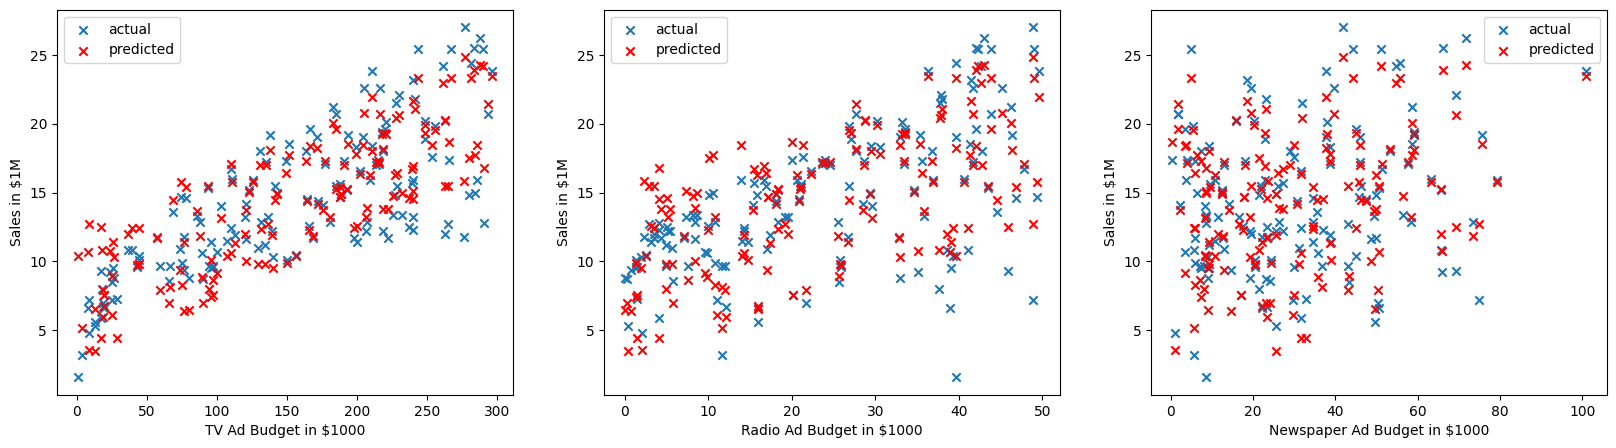

In [506]:
model1.get_scatter_plots()

### Cost History Plot

This plot displays the cost (mean squared error) over each iteration of gradient descent. A decreasing trend indicates that the model is learning and converging.

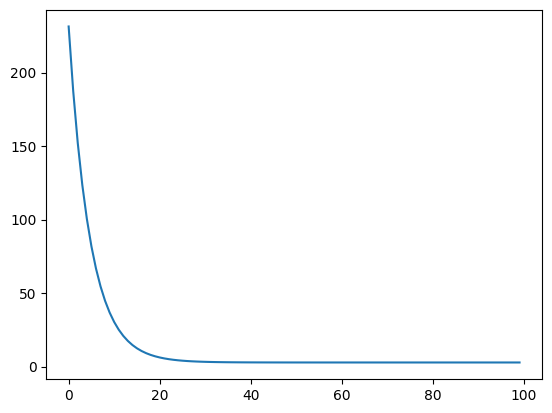

In [507]:
model1.get_cost_plot()

### Final Training Cost

We display the final training cost (MSE) after the gradient descent process completes.

In [508]:
print(model1.cost_history[-1])

2.7678978088020116


## Implementing Linear Regression using Scikit-Learn

To provide a benchmark, we will train a linear regression model using `scikit-learn` and compare its performance with our custom implementation.

In [509]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Initializing and Training Scikit-Learn Model

We create an instance of `LinearRegression` from `scikit-learn` and train it using the same training data.

In [510]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

### Generating Predictions for Scikit-Learn Model

We generate predictions for both the training and testing sets using the `scikit-learn` model.

In [511]:
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

## Comparison: Our Model vs. Scikit-Learn Model

We now compare the learned parameters (weights and bias) and the Mean Squared Error (MSE) on both training and testing sets for our custom model and the `scikit-learn` model.

In [512]:
print("----------------------------------------------------------")
print(f"OUR MODEL:")
print(f"weight: {model1.original_weight}, Bias: {model1.original_bias}")
print(f"train MSE: {model1.cost_history[-1]}")
print(f"test MSE: {model1.get_test_cost()}")
print("----------------------------------------------------------")
print("SCIKITLEARN-LEARN MODEL:")
print(f"weight: {model2.coef_}, Bias: {model2.intercept_}")
print(f"train MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"test MSE: {mean_squared_error(y_test, y_test_pred)}")
print("----------------------------------------------------------")

----------------------------------------------------------
OUR MODEL:
weight: [0.04543419 0.19131116 0.00267274], Bias: 2.778055887615004
train MSE: 2.7678978088020116
test MSE: 2.880583847503282
----------------------------------------------------------
SCIKITLEARN-LEARN MODEL:
weight: [0.04543356 0.19145654 0.00256809], Bias: 2.7783034602452847
train MSE: 2.7678910780469725
test MSE: 2.8800237300941927
----------------------------------------------------------


### Making Predictions with Our Model

Let's use our custom model to predict sales for a sample input, similar to the first row of our dataset.

In [513]:
model1.get_prediction(np.array([
    [230.1, 37.8, 69.2] # Our Model Prediction
]))

array([20.64897774])

### Making Predictions with Scikit-Learn Model

Similarly, we use the `scikit-learn` model to predict sales for the same sample input.

In [514]:
model2.predict(np.array([
    [230.1, 37.8, 69.2] # Scikit-Learn Prediction
]))

array([20.64733423])

## Conclusion

Both the custom-built linear regression model and the `scikit-learn` implementation yield very similar results in terms of weights, bias, and MSE. This demonstrates the correctness of our manual implementation.